# Multi Regression Task

"""
This Jupyter Notebook file contains the code for a multi-regression task. 
It demonstrates how to train a machine learning model to predict multiple output variables based on multiple input variables.
The code includes data preprocessing, model training, and evaluation steps.
"""
## Alperen KOÇYİĞİT


In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets

In [225]:
diabetes = datasets.load_diabetes()

In [226]:
features = diabetes['feature_names']
print(features)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [227]:
# Check for missing values
missing_values = np.sum(pd.isnull(diabetes.data))
print("Missing values:", missing_values)

# Identify categorical variables
categorical_variables = []
for i in range(diabetes.data.shape[1]):
    if len(np.unique(diabetes.data[:, i])) < 5:
        categorical_variables.append(i)
print("Categorical variables:", categorical_variables)

# Check for normally distributed variables
normal_variables = []
for i in range(diabetes.data.shape[1]):
    if np.abs(np.mean(diabetes.data[:, i]) - np.median(diabetes.data[:, i])) < 1:
        normal_variables.append(i)
print("Normally distributed variables:", normal_variables)

# Show descriptive statistics
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
print(df.describe())


Missing values: 0
Categorical variables: [1]
Normally distributed variables: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   3.918434e-17 -5.7

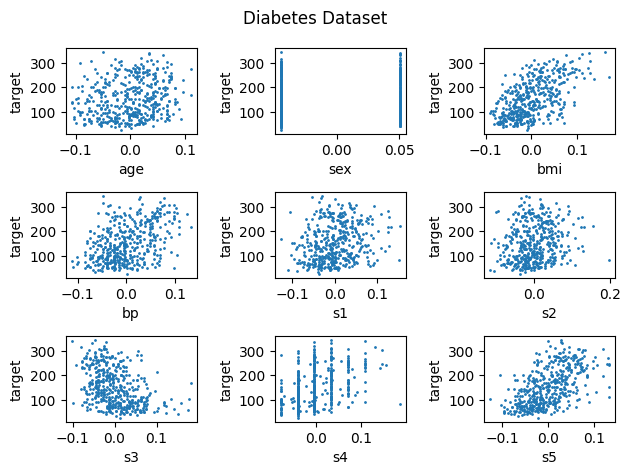

In [228]:
diabetes = datasets.load_diabetes(as_frame=True)

fig, axs = plt.subplots(3, 3)
fig.suptitle('Diabetes Dataset')
for i in range(3):
    for j in range(3):
        n = j + i * 3
        feature = features[n]
        axs[i, j].scatter(diabetes['data'][feature], diabetes['target'], s=1)
        axs[i, j].set_xlabel(feature)
        axs[i, j].set_ylabel('target')
plt.tight_layout()
plt.show()

In [229]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [230]:
num_features = diabetes.data.shape[1]

df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df['Progression'] = diabetes.target

print(df.head())

X = df.drop(labels='Progression', axis=1)  #axis=1 means we drop data by column.

#dependent variable / response / target variable.
y = df['Progression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  Progression  
0 -0.002592  0.019907 -0.017646        151.0  
1 -0.039493 -0.068332 -0.092204         75.0  
2 -0.002592  0.002861 -0.025930        141.0  
3  0.034309  0.022688 -0.009362        206.0  
4 -0.002592 -0.031988 -0.046641        135.0  


In [231]:
# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(num_features,)))  # Add input layer
model.add(Dense(64, activation='relu'))  # Add hidden layer
model.add(Dense(1))  # Add output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)

Epoch 1/500


/home/alperen/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 28309.6094
Epoch 2/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 31137.1387 
Epoch 3/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28360.7578 
Epoch 4/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30070.9258 
Epoch 5/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 31205.6699 
Epoch 6/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 29410.0469 
Epoch 7/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27919.6348 
Epoch 8/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28944.0176 
Epoch 9/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25355.0430 
Epoch 10/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 25936.3789
Epoch 11/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 25238.5410
Epoch 12/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 21530.1270
Epoch 13/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 19806.1309
Epoch 14/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - loss: 19678.1152
Epoch 1

In [232]:
model.summary()

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_103 (Dense)               │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,789 (57.77 KB)

 Trainable params: 4,929 (19.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,860 (38.52 KB)

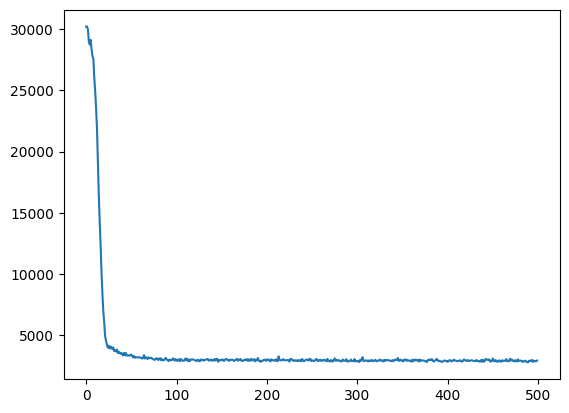

In [233]:
plt.plot(history.history["loss"])

In [234]:
predictions = model.predict(X_test)

test_predicted = model.predict(X)

print(predictions[:5])
print(y_test[:5])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step
[[140.2839 ]
 [186.50174]
 [135.06635]
 [304.97073]
 [120.36703]]
287    219.0
211     70.0
72     202.0
321    230.0
73     111.0
Name: Progression, dtype: float64


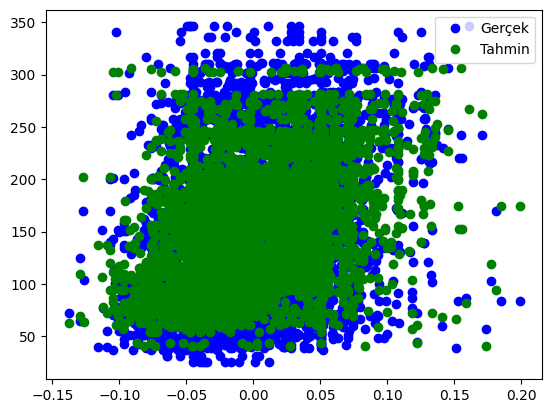

In [235]:
plt.plot(X, y, 'bo')
plt.plot(X, test_predicted, 'go')

plt.legend(handles=[plt.Line2D([], [], color='blue', marker='o', linestyle='None'),
                    plt.Line2D([], [], color='green', marker='o', linestyle='None')],
           labels=["Gerçek", "Tahmin"])


# Here is a alternative way with using Sklearn Lineear Models

In [236]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [237]:
print(lm.score(X_train, y_train))

0.519034189167905


In [238]:
coeff = pd.Series(lm.coef_, index = X_train.columns)
intercept = lm.intercept_

print("Coefficients:\n")
print(coeff)
print("\n")
print("Intercept:\n")
print(intercept)
print("\n")

Coefficients:

age     47.749681
sex   -241.990907
bmi    531.971063
bp     381.562862
s1    -918.502905
s2     508.257783
s3     116.950164
s4     269.492303
s5     695.808117
s6      26.324582
dtype: float64


Intercept:

151.6651755919933




In [239]:
formula = "Diabetes Progression ="
for i, feature in enumerate(features):
    formula += f" {intercept} + {coeff.iloc[i]} x {feature}"
    
print(formula)

Diabetes Progression = 151.6651755919933 + 47.749680540519044 x age 151.6651755919933 + -241.99090727900412 x sex 151.6651755919933 + 531.9710628796018 x bmi 151.6651755919933 + 381.5628618242739 x bp 151.6651755919933 + -918.5029045531526 x s1 151.6651755919933 + 508.25778251946934 x s2 151.6651755919933 + 116.95016446982824 x s3 151.6651755919933 + 269.49230279792414 x s4 151.6651755919933 + 695.8081171154511 x s5 151.6651755919933 + 26.32458202808558 x s6
